# Example

To download the csv just

wget https://www.aprendemachinelearning.com/wp-content/uploads/2018/03/analisis.csv

* usuario (el nombre en Twitter)
* “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
* “co” =Conscientiousness – grado de orden, prolijidad, organización
* “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
* “ag” = Agreeableness – grado de empatía con los demás, temperamento
* “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
* Wordcount – Cantidad promedio de palabras usadas en sus tweets
* Categoria – Actividad laboral del usuario (actor, cantante, etc.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

* Actor/actriz
* Cantante
* Modelo
* Tv, series
* Radio
* Tecnología
* Deportes
* Politica
* Escritor

In [4]:
#How many records we have on each cat
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


## Dataviz

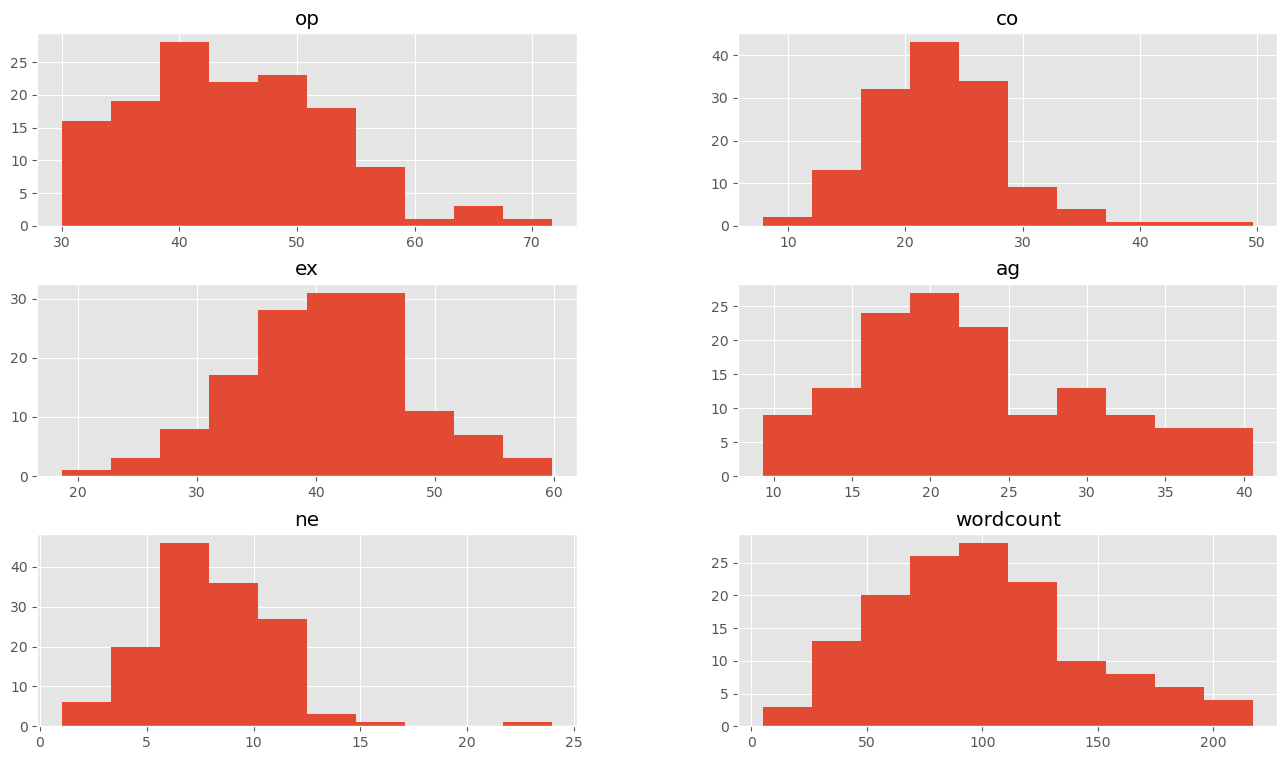

In [5]:
dataframe.drop(columns='categoria').hist()
plt.show()

We choose 3 features (op, ex, ag) and see how related they are

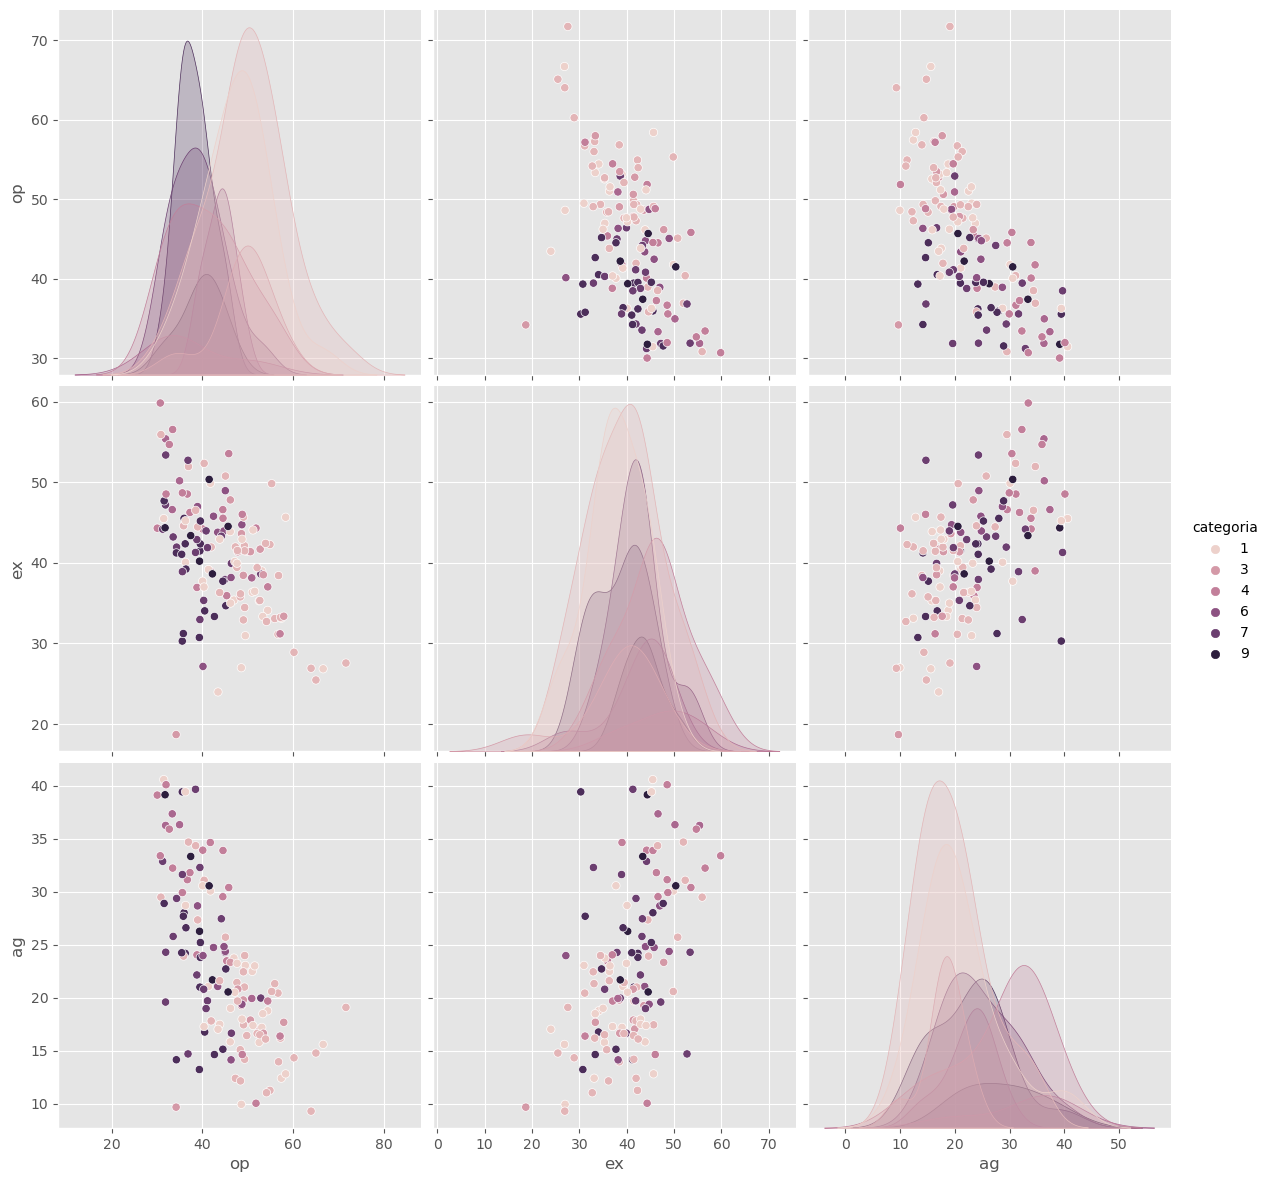

In [6]:
sb.pairplot(dataframe.dropna(), hue='categoria',height=4,vars=["op","ex","ag"],kind='scatter')

## Entry data

In [7]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

In [8]:
X

array([[34.297953, 41.948819, 29.370315],
       [44.986842, 37.938947, 24.279098],
       [41.733854, 38.999896, 34.645521],
       [40.377154, 52.337538, 31.082154],
       [36.664677, 48.530806, 31.138871],
       [33.531771, 43.211667, 25.786667],
       [31.851102, 47.182362, 19.594331],
       [31.865118, 55.377559, 36.258346],
       [46.393488, 39.93031 , 16.658062],
       [39.436667, 32.966288, 32.291591],
       [52.750992, 41.698855, 17.057176],
       [41.328182, 39.173333, 21.070505],
       [54.407727, 34.104318, 18.771818],
       [47.610076, 39.439545, 21.438409],
       [39.435149, 41.479403, 21.004104],
       [48.617348, 43.617955, 19.263258],
       [40.073543, 44.194724, 33.921417],
       [43.37292 , 43.792263, 21.067737],
       [49.792403, 41.435581, 16.433953],
       [30.020465, 44.29969 , 39.117984],
       [36.909459, 51.947297, 34.687568],
       [50.594462, 41.383154, 17.896538],
       [34.186667, 18.693542,  9.682292],
       [31.215455, 44.180909, 32.8

In [9]:
y

array([7, 7, 4, 2, 4, 7, 7, 5, 7, 7, 3, 1, 1, 2, 8, 3, 4, 6, 2, 4, 2, 3,
       3, 7, 2, 4, 8, 1, 4, 3, 8, 1, 2, 7, 4, 5, 1, 2, 2, 1, 6, 2, 6, 1,
       1, 2, 6, 3, 1, 7, 2, 8, 6, 2, 8, 2, 1, 3, 8, 2, 8, 4, 2, 1, 8, 9,
       1, 1, 2, 4, 6, 8, 8, 4, 9, 2, 8, 4, 4, 9, 5, 2, 4, 1, 2, 7, 2, 3,
       2, 1, 2, 7, 2, 2, 1, 7, 7, 2, 4, 6, 1, 1, 1, 4, 2, 4, 2, 8, 7, 5,
       9, 9, 8, 9, 7, 1, 8, 2, 4, 8, 8, 2, 2, 1, 2, 1, 6, 2, 4, 2, 1, 1,
       1, 7, 3, 7, 4, 2, 1, 1])

/var/folders/2r/bx7qcdrs231f759gj82n0jdw0000gn/T/ipykernel_3695/3415745813.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


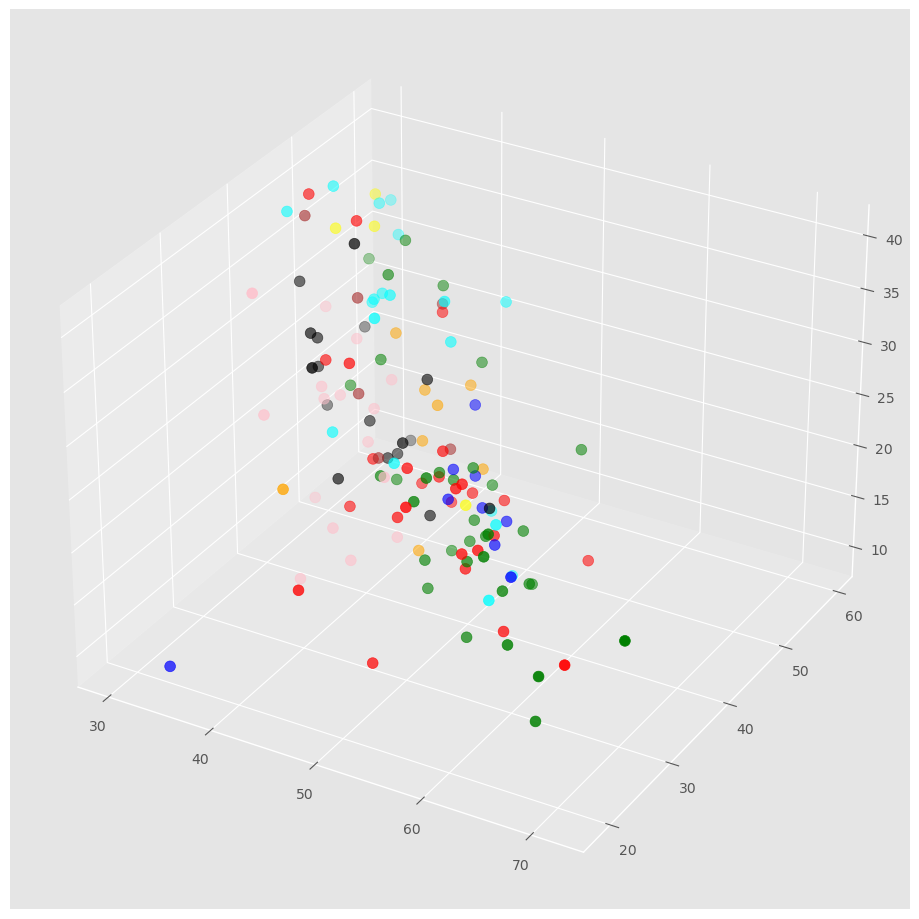

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)


## Getting the K value

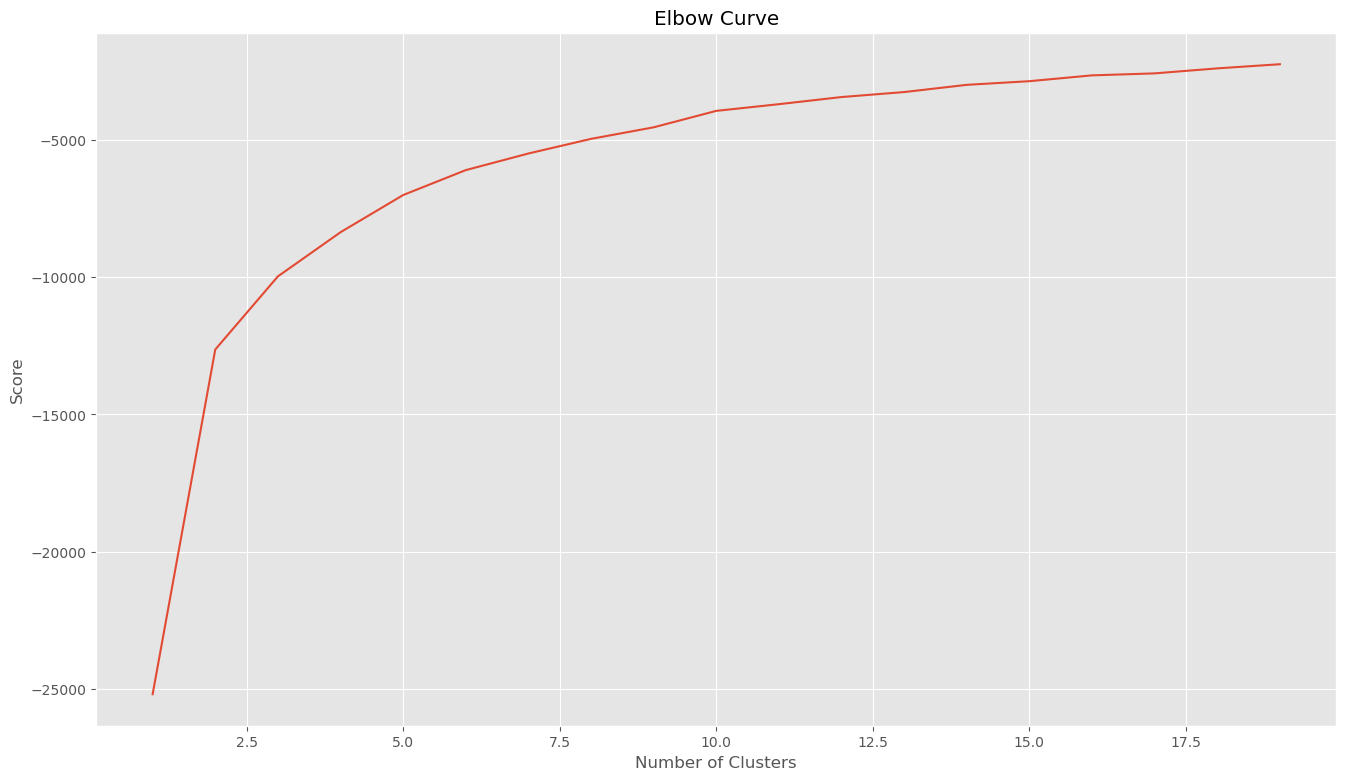

In [11]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Looking at the curve 5 is a good number (could be other)

# Executing 

In [12]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids) #5 3d points

[[49.85887044 41.15660338 17.54193885]
 [35.90241306 47.56828232 33.58748762]
 [39.79572573 43.31488953 23.42198887]
 [42.968253   32.53013537 20.93305995]
 [57.92200861 31.5039735  15.67199517]]


In [13]:
# Predicting the clusters
labels = kmeans.predict(X)

In [14]:
labels

array([1, 3, 1, 1, 1, 2, 2, 1, 0, 3, 0, 2, 4, 0, 2, 0, 1, 2, 0, 1, 1, 0,
       3, 1, 0, 3, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2,
       4, 4, 0, 0, 1, 1, 0, 2, 1, 4, 1, 4, 3, 0, 3, 4, 3, 2, 0, 4, 2, 2,
       4, 4, 4, 1, 2, 3, 0, 0, 2, 4, 2, 1, 1, 1, 1, 2, 4, 0, 3, 2, 0, 2,
       0, 0, 0, 3, 3, 0, 0, 2, 1, 0, 1, 0, 4, 0, 0, 1, 4, 0, 2, 2, 2, 0,
       0, 1, 1, 1, 2, 0, 3, 4, 1, 2, 3, 1, 0, 3, 4, 3, 3, 0, 0, 3, 0, 0,
       3, 2, 4, 1, 1, 4, 0, 1], dtype=int32)

In [15]:
C = kmeans.cluster_centers_
# Getting the cluster centers
colores=['red','green','blue','cyan','yellow']
#A color for every group
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [16]:
colores

['red', 'green', 'blue', 'cyan', 'yellow']

In [17]:
asignar

['green',
 'cyan',
 'green',
 'green',
 'green',
 'blue',
 'blue',
 'green',
 'red',
 'cyan',
 'red',
 'blue',
 'yellow',
 'red',
 'blue',
 'red',
 'green',
 'blue',
 'red',
 'green',
 'green',
 'red',
 'cyan',
 'green',
 'red',
 'cyan',
 'green',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'blue',
 'cyan',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'yellow',
 'red',
 'red',
 'green',
 'green',
 'red',
 'blue',
 'green',
 'yellow',
 'green',
 'yellow',
 'cyan',
 'red',
 'cyan',
 'yellow',
 'cyan',
 'blue',
 'red',
 'yellow',
 'blue',
 'blue',
 'yellow',
 'yellow',
 'yellow',
 'green',
 'blue',
 'cyan',
 'red',
 'red',
 'blue',
 'yellow',
 'blue',
 'green',
 'green',
 'green',
 'green',
 'blue',
 'yellow',
 'red',
 'cyan',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'cyan',
 'cyan',
 'red',
 'red',
 'blue',
 'green',
 'red',
 'green',
 'red',
 'yellow',
 'red',
 'red',
 'green',
 'yellow',
 'red',
 'blue',
 'blue',
 'bl

In [18]:
C

array([[49.85887044, 41.15660338, 17.54193885],
       [35.90241306, 47.56828232, 33.58748762],
       [39.79572573, 43.31488953, 23.42198887],
       [42.968253  , 32.53013537, 20.93305995],
       [57.92200861, 31.5039735 , 15.67199517]])

/var/folders/2r/bx7qcdrs231f759gj82n0jdw0000gn/T/ipykernel_3695/495080259.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


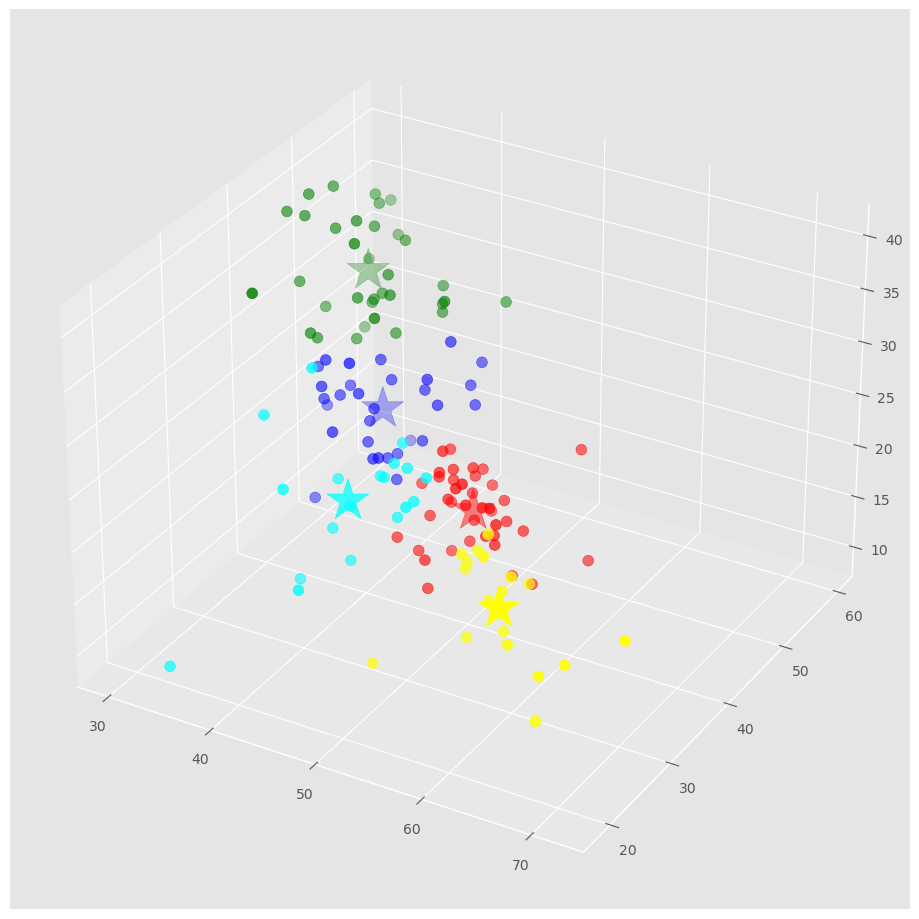

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
# X[:, 1]=> column 1
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

## op, ex values and groups

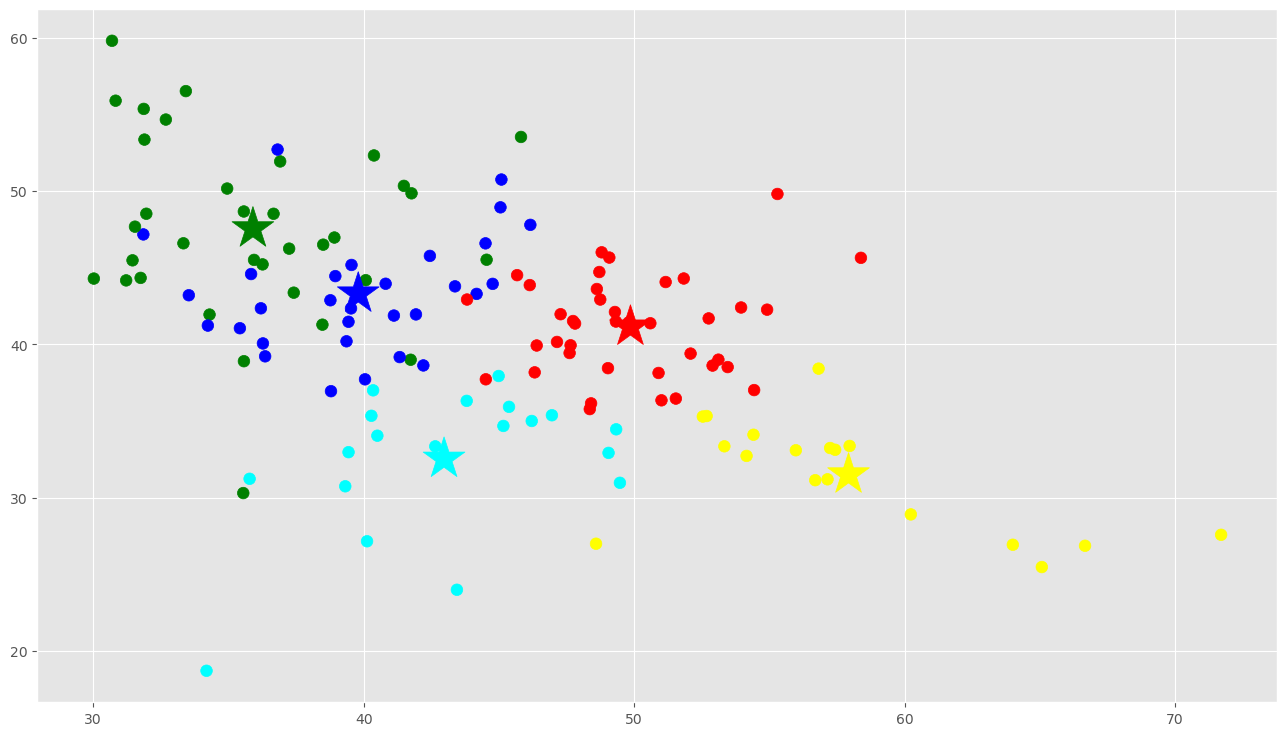

In [20]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [21]:
C[:, 0]

array([49.85887044, 35.90241306, 39.79572573, 42.968253  , 57.92200861])

In [22]:
C[:, 1]

array([41.15660338, 47.56828232, 43.31488953, 32.53013537, 31.5039735 ])

In [23]:
asignar

['green',
 'cyan',
 'green',
 'green',
 'green',
 'blue',
 'blue',
 'green',
 'red',
 'cyan',
 'red',
 'blue',
 'yellow',
 'red',
 'blue',
 'red',
 'green',
 'blue',
 'red',
 'green',
 'green',
 'red',
 'cyan',
 'green',
 'red',
 'cyan',
 'green',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'blue',
 'cyan',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'yellow',
 'red',
 'red',
 'green',
 'green',
 'red',
 'blue',
 'green',
 'yellow',
 'green',
 'yellow',
 'cyan',
 'red',
 'cyan',
 'yellow',
 'cyan',
 'blue',
 'red',
 'yellow',
 'blue',
 'blue',
 'yellow',
 'yellow',
 'yellow',
 'green',
 'blue',
 'cyan',
 'red',
 'red',
 'blue',
 'yellow',
 'blue',
 'green',
 'green',
 'green',
 'green',
 'blue',
 'yellow',
 'red',
 'cyan',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'cyan',
 'cyan',
 'red',
 'red',
 'blue',
 'green',
 'red',
 'green',
 'red',
 'yellow',
 'red',
 'red',
 'green',
 'yellow',
 'red',
 'blue',
 'blue',
 'bl